<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import os
import cv2
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/flipkart_com-ecommerce_sample_1050.csv'
df_raw= pd.read_csv(url)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = "/content/drive/MyDrive/P6_market_place/Images"

path = DATADIR
for img in os.listdir(DATADIR):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array



    break

In [136]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df1_test.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))

928
927


In [137]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()

dico = []
prob = []
for leaf in train.image:
    img = cv2.imread(img_path +'/'+ str(leaf),cv2.IMREAD_GRAYSCALE)

    orb = cv.ORB_create()
    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    if len(kp)==0:
      prob.append(leaf)
      des= []
    


    for d in des:
      dico.append(d)


In [139]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
k = np.size(labels) * 10

batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)


Init 1/3 with method k-means++
Inertia for init 1/3: 1188316897.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1181004543.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1182904435.0
Minibatch step 1/14110: mean batch inertia: 125795.78412698413
Minibatch step 2/14110: mean batch inertia: 101019.03801339146, ewa inertia: 101019.03801339146
[MiniBatchKMeans] Reassigning 1 cluster centers.
Minibatch step 3/14110: mean batch inertia: 99207.94523610467, ewa inertia: 100993.36788464151
Minibatch step 4/14110: mean batch inertia: 98194.32799975894, ewa inertia: 100953.69475738802
Minibatch step 5/14110: mean batch inertia: 97370.96186303142, ewa inertia: 100902.91369535287
Minibatch step 6/14110: mean batch inertia: 97889.20196904735, ewa inertia: 100860.19784501116
Minibatch step 7/14110: mean batch inertia: 97308.23282239675, ewa inertia: 100809.85288168883
Minibatch step 8/14110: mean batch inertia: 97635.72683507256, ewa inertia: 100764.8633453674
Minibatch step 9/14110: m

In [142]:
kmeans.verbose = False
histo_list = []

for leaf in train.image:
    img = cv2.imread(img_path +'/'+ str(leaf) )
    kp, des = orb.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [147]:
    X = np.array(histo_list)
    Y = []

    # It's a way to convert species name into an integer
    for s in train.categories:
        Y.append(np.min(np.nonzero(labels == s)))

    mlp = MLPClassifier(verbose=True, max_iter=600000)
    mlp.fit(X, Y)

Iteration 1, loss = 3.14386403
Iteration 2, loss = 3.11945845
Iteration 3, loss = 3.09606082
Iteration 4, loss = 3.07236494
Iteration 5, loss = 3.04799117
Iteration 6, loss = 3.02402122
Iteration 7, loss = 3.00059538
Iteration 8, loss = 2.97724383
Iteration 9, loss = 2.95479348
Iteration 10, loss = 2.93404108
Iteration 11, loss = 2.91567606
Iteration 12, loss = 2.89941362
Iteration 13, loss = 2.88607773
Iteration 14, loss = 2.87367679
Iteration 15, loss = 2.86561191
Iteration 16, loss = 2.85859961
Iteration 17, loss = 2.85246872
Iteration 18, loss = 2.84818390
Iteration 19, loss = 2.84426224
Iteration 20, loss = 2.84105148
Iteration 21, loss = 2.83804972
Iteration 22, loss = 2.83573594
Iteration 23, loss = 2.83335768
Iteration 24, loss = 2.83087548
Iteration 25, loss = 2.82855332
Iteration 26, loss = 2.82624455
Iteration 27, loss = 2.82372293
Iteration 28, loss = 2.82129531
Iteration 29, loss = 2.81887427
Iteration 30, loss = 2.81622446
Iteration 31, loss = 2.81335444
Iteration 32, los

MLPClassifier(max_iter=600000, verbose=True)

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X,Y)
cross_val_score(nb_classifier, X,Y, cv=5, scoring='accuracy')

array([0.16129032, 0.16129032, 0.15675676, 0.16216216, 0.16216216])

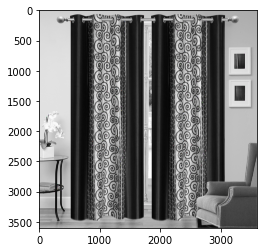

(<matplotlib.image.AxesImage at 0x7f00934d7490>, None)

In [ ]:
import numpy as np
import cv2 as cv
#7b72c92c2f6c40268628ec5f14c6d590.jpg
#9743e6d1c9f3180483825fe4d2e97836.jpg
from matplotlib  import pyplot as plt
img = cv2.imread(img_path +'/'+ '9743e6d1c9f3180483825fe4d2e97836.jpg',cv.IMREAD_GRAYSCALE)
alpha = 1# Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
#adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
orb = cv2.ORB_create()
kp = orb.detect(img,None)
kp,des = orb.compute(img, kp)
img2 = cv2.drawKeypoints(img, kp, None, flags=0)
plt.imshow(img2), plt.show()


In [ ]:
des

array([[  9, 221, 115, ..., 144, 107, 141],
       [ 57, 141, 107, ..., 186, 112,   8],
       [ 76, 189,  17, ...,   2,   7, 190],
       ...,
       [130,  67,   6, ...,  21, 161, 208],
       [ 93, 191,  18, ..., 134, 236, 125],
       [ 89, 187,  88, ..., 132, 236, 125]], dtype=uint8)

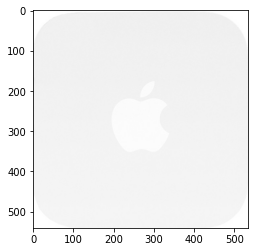

(<matplotlib.image.AxesImage at 0x7f009047bb50>, None)

In [124]:


img = cv.imread(img_path +'/'+ '9743e6d1c9f3180483825fe4d2e97836.jpg',cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [ ]:
np.shape(des)